# 1. Analysis Data

In [8]:
%matplotlib inline

import h5py
import pandas as pd
import numpy as np
import copy
import os
import sys
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

### pre-defined functions

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

def draw_ts(timeSeries):
    f = plt.figure(figsize=(10,5), facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()
    
# analysis stationarity 
def test_stationarity(timeseries, w=20, title='test_ts'):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=w).mean()
    rolstd = timeseries.rolling(window=w).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(10,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test: (ADF test)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# devide to several parts
def test_seasonal_decopose(ts_log, title_all='seaonal analysis of o/c price'):
    
    decomposition = seasonal_decompose(ts_log, model="additive")
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    df=pd.DataFrame()
    df['original']=ts_log
    df['trend']=trend
    df['seasonal']=seasonal
    df['residual']=residual

    df.plot(figsize=(10,5), title=title_all)
    df.plot(figsize=(10,5), title='seaonal decompose', subplots=True, layout=(2,2))
    plt.show()

### load data

In [3]:
# load data file names
working_folder = ".."
data_folder = os.path.join(working_folder, 'data')
format1_files = ['data_format1_201808.h5']#, 'data_format1_201808.h5']
format2_files = ['data_format2_201808.h5']#, 'data_format2_201808.h5']

# for f in os.listdir(data_folder):
#     if len(f) == 22:
#         if 'format1' in f:
#             format1_files.append(f)
#         elif 'format2' in f:
#             format2_files.append(f)

sorted(format1_files)
sorted(format2_files)
print(format1_files)
print(format2_files)

['data_format1_201808.h5']
['data_format2_201808.h5']


In [4]:
cur_datas = pd.DataFrame()
cur_datas_bch = pd.DataFrame()
cur_datas_btc = pd.DataFrame()
opened_files = list()
f1_data_all = pd.DataFrame()
for f in format1_files:
    f_fp = os.path.join(data_folder, f)
#     print(f_fp)
    f1_data = pd.HDFStore(f_fp)
    opened_files.append(f1_data)
    cur_bch = f1_data['BCH-USD']
    cur_btc = f1_data['BTC-USD']

    if not cur_datas.empty:
        f1_data_all = f1_data_all.append(f1_data)
        cur_datas = cur_datas.append(cur_bch)
        cur_datas_bch = cur_datas.append(cur_bch)
        cur_datas_btc = cur_datas.append(cur_btc)
    else:
        f1_data_all = f1_data
        cur_datas = cur_bch
        cur_datas_bch = cur_bch
        cur_datas_btc = cur_btc

## 1.1 change rate relation analysis

In [269]:
# calculate price
cur_datas_bch = (0.25 * (cur_datas_bch['close'] + cur_datas_bch['open'] + cur_datas_bch['high'] + cur_datas_bch['low']))
cur_datas_btc = (0.25 * (cur_datas_btc['close'] + cur_datas_btc['open'] + cur_datas_btc['high'] + cur_datas_btc['low']))

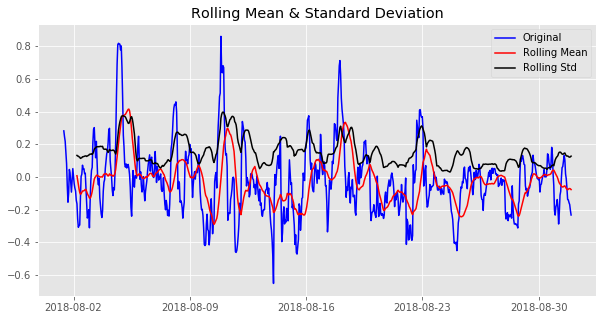

Results of Dickey-Fuller Test:
Test Statistic                  -4.609975
p-value                          0.000124
#Lags Used                      20.000000
Number of Observations Used    713.000000
Critical Value (1%)             -3.439555
Critical Value (5%)             -2.865602
Critical Value (10%)            -2.568933
dtype: float64


In [270]:
# resampling to H
cur_datas_bch = cur_datas_bch.resample('H').mean()
cur_datas_btc = cur_datas_btc.resample('H').mean()
cur_datas_bch = (cur_datas_bch - cur_datas_bch.mean()) / cur_datas_bch.std()
cur_datas_btc = (cur_datas_btc - cur_datas_btc.mean()) / cur_datas_btc.std()
# price changing range
ts = (cur_datas_bch.diff(10) / cur_datas_bch.diff(10).max() - cur_datas_btc.diff(10) / cur_datas_btc.diff(10).max())#.plot(figsize=(15, 10))
# diff to stable
ts_log = np.log(ts)
ts_diff = ts_log.diff(1)
ts_diff.dropna(inplace=True)
# ts_log.dropna(inplace=True)
# test_stationarity(ts_log)
ts.dropna(inplace=True)
test_stationarity(ts)
# ts.head()

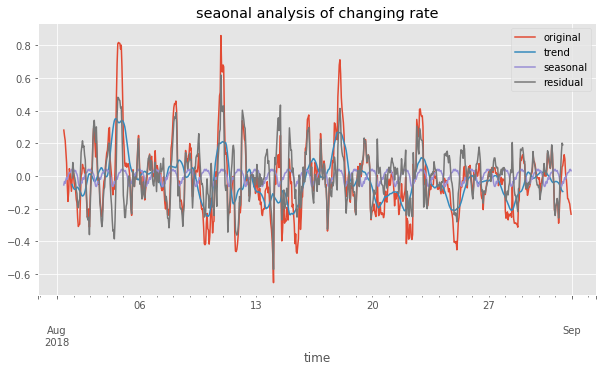

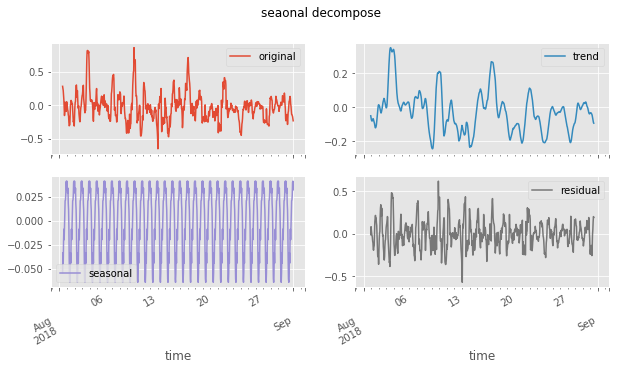

In [271]:
test_seasonal_decopose(ts, title_all='seaonal analysis of changing rate')

In [247]:
# close all data file
# for f in opened_files:
#     f.close()

## 1.2 Open / Close price Analysis

In [5]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [65]:
cur_data = cur_datas.copy()

times=cur_data.index
print(f"there are totall {len(times)} data points")
# print(cur_data.iloc[1].name)

cur_data = cur_data.resample('1D').max()
high_series = cur_data['high']
low_series = cur_data['low']
open_series = cur_data['open']
close_series = cur_data['close']
volumn_series = cur_data['volume']

there are totall 44640 data points


<Figure size 576x396 with 0 Axes>

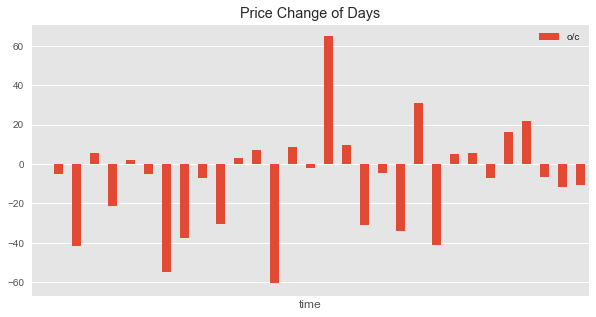

In [66]:
import matplotlib.style as style
from pandas.plotting import radviz

fig = plt.figure()
style.use('ggplot')

plt_data = pd.DataFrame()
plt_data['o/c'] = open_series - open_series.shift(periods=1) 
plt_data.plot(kind='bar', figsize=(10,5), subplots=False, title='Price Change of Days', grid=True)
plt.xticks([])
fig.show()

In [70]:
# fig_cur = plt.figure()
# cur_data.plot(figsize=(10,5), title='currency', grid=True)
# fig_cur.show()

# resample 2H
cur_data = cur_datas.copy()
cur_data = cur_data.resample('2H').max()
# ts = cur_data['close']
# ts = pd.DataFrame()
# ts['o/c'] = cur_data['open'] - cur_data['close']
ts = cur_data['open'] - cur_data['close']

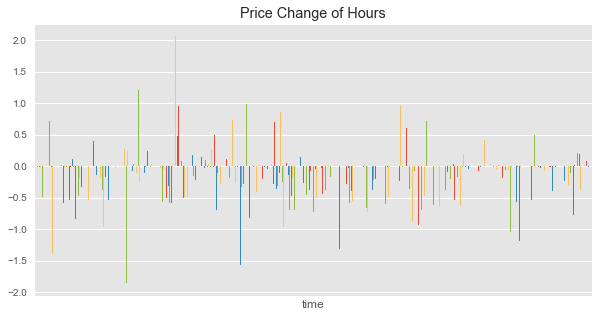

In [73]:
# style.use('seaborn-whitegrid')
style.use('ggplot')
# sns.barplot(x=[x for x in range(len(ts))], y=ts.values)
ts.plot(kind='bar', figsize=(10,5), subplots=False, title='Price Change of Hours', grid=True)
plt.xticks([])
fig.show()

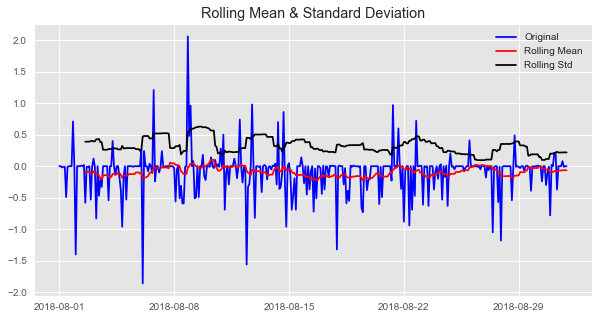

Results of Dickey-Fuller Test:
Test Statistic                 -19.021851
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    371.000000
Critical Value (1%)             -3.448100
Critical Value (5%)             -2.869362
Critical Value (10%)            -2.570937
dtype: float64


In [74]:
test_stationarity(ts)

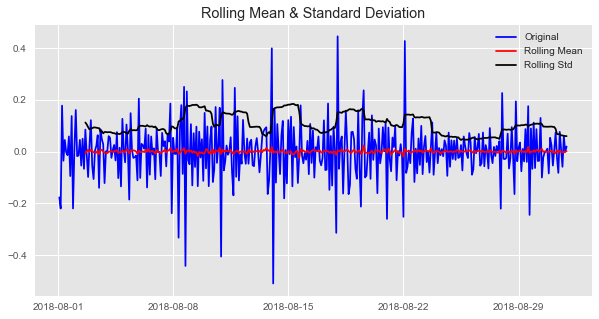

Results of Dickey-Fuller Test:
Test Statistic                -1.151478e+01
p-value                        4.175622e-21
#Lags Used                     7.000000e+00
Number of Observations Used    3.630000e+02
Critical Value (1%)           -3.448494e+00
Critical Value (5%)           -2.869535e+00
Critical Value (10%)          -2.571029e+00
dtype: float64


In [87]:
# # diff to stable
# ts_log = ts #np.log(ts)
ts_diff = ts_log.diff(1)
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)

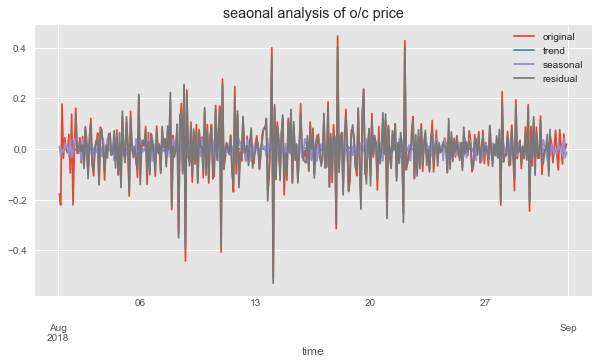

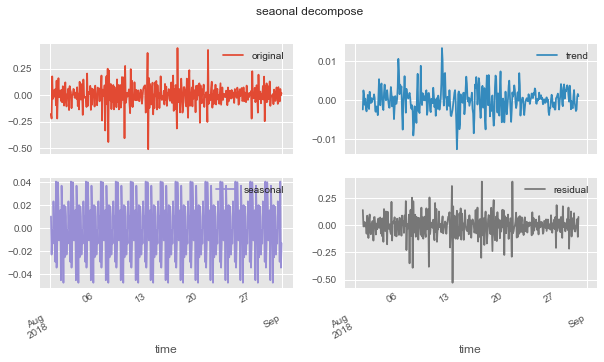

In [88]:
test_seasonal_decopose(ts_diff, title_all='seaonal analysis of o/c price')

## 1.3 Single Crypto Currency Analysis (BTC)

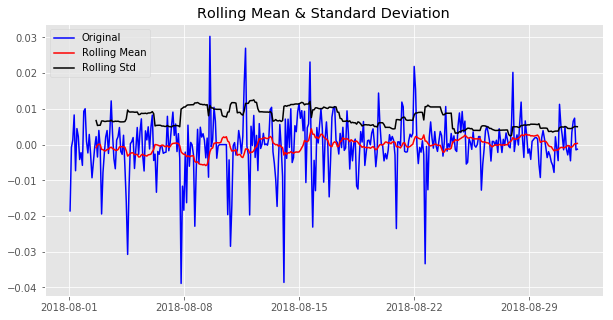

Results of Dickey-Fuller Test:
Test Statistic                -1.091780e+01
p-value                        1.056608e-19
#Lags Used                     2.000000e+00
Number of Observations Used    3.680000e+02
Critical Value (1%)           -3.448245e+00
Critical Value (5%)           -2.869426e+00
Critical Value (10%)          -2.570971e+00
dtype: float64


In [265]:
# model identification for each part
ts = cur_datas_btc.resample('2H').mean()#.rolling(window=20).mean()
ts.dropna(inplace=True)
ts_log = np.log(ts)
ts_diff_1 = ts_log.diff(1)
ts_diff_1.dropna(inplace=True)
test_stationarity(ts_diff_1)

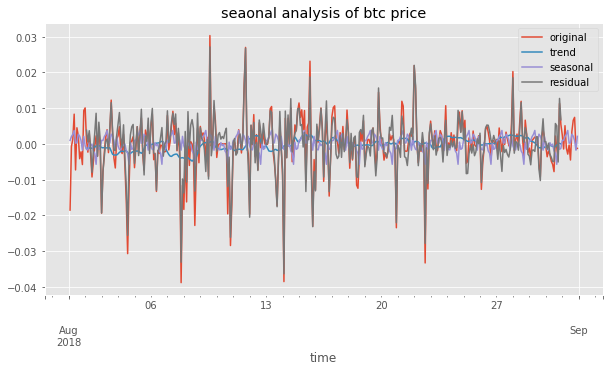

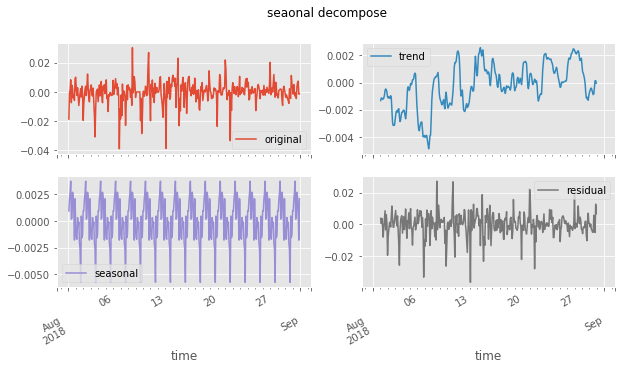

In [266]:
test_seasonal_decopose(ts_diff_1, title_all='seaonal analysis of btc price')

## 1.4 Crypto Currencies Relation Analysis

In [256]:
import seaborn as sns

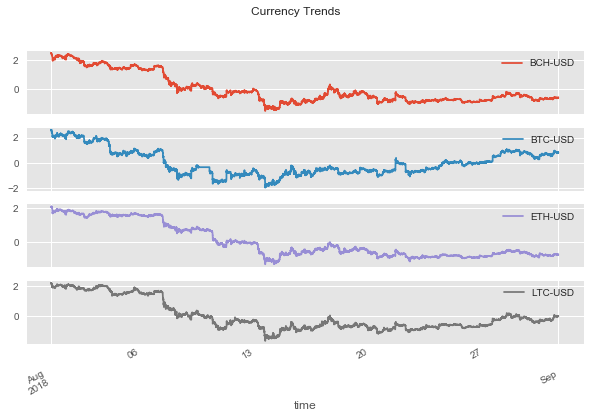

In [96]:
f1_data = f1_data_all
# keys = f1_data.keys()
keys = ['BCH-USD', 'BTC-USD', 'ETH-USD', 'LTC-USD']
series_avg = pd.DataFrame()
for key in keys:
    avg = (0.25 * (f1_data[key]['close'] + f1_data[key]['open'] + f1_data[key]['high'] + f1_data[key]['low']))
    avg = (avg - avg.mean()) / avg.std()
    series_avg[key] = avg
series_avg.plot(figsize=(10,6), grid=True, subplots=True, title='Currency Trends')
plt.show()

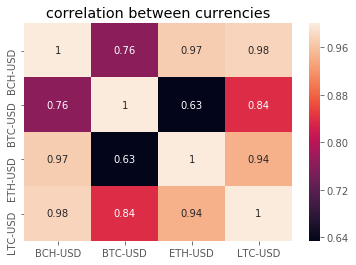

In [258]:
# series_avg.corr()
sns.heatmap(series_avg.corr(), annot=True)
plt.title('correlation between currencies')
plt.show()

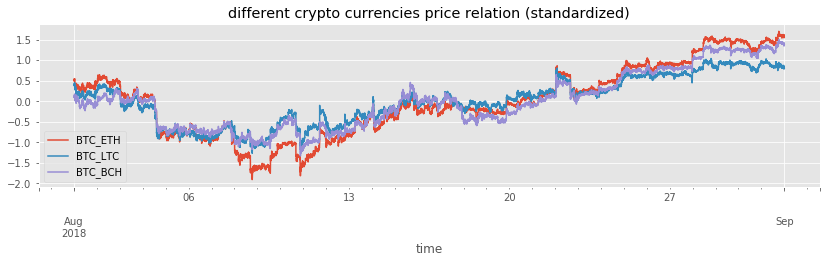

In [259]:
diff_prices = pd.DataFrame()
diff_prices['BTC_ETH'] = (series_avg['BTC-USD'] - series_avg['ETH-USD'])
diff_prices['BTC_LTC'] = (series_avg['BTC-USD'] - series_avg['LTC-USD'])
diff_prices['BTC_BCH'] = (series_avg['BTC-USD'] - series_avg['BCH-USD'])
diff_prices.plot(figsize=(14,3), title='different crypto currencies price relation (standardized)')
plt.show()

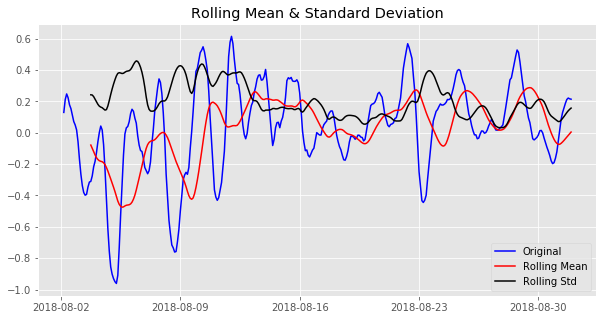

Results of Dickey-Fuller Test:
Test Statistic                  -3.174008
p-value                          0.021539
#Lags Used                      17.000000
Number of Observations Used    340.000000
Critical Value (1%)             -3.449730
Critical Value (5%)             -2.870079
Critical Value (10%)            -2.571319
dtype: float64


In [260]:
# model identification for each part
rol_mean = diff_prices['BTC_ETH'].resample('2H').mean().rolling(window=5).mean()
rol_mean.dropna(inplace=True)
ts_diff_2 = rol_mean.diff(10)
ts_diff_2.dropna(inplace=True)
test_stationarity(ts_diff_2)

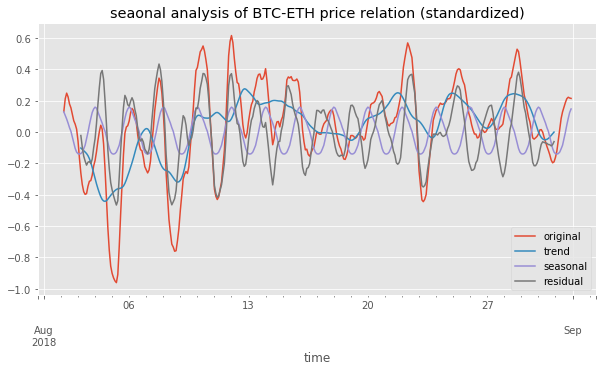

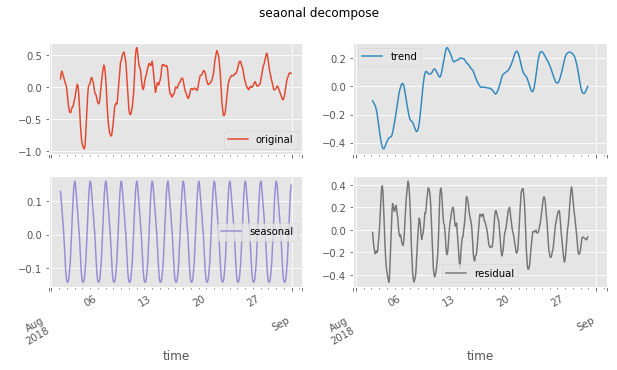

In [261]:
test_seasonal_decopose(ts_diff_2, title_all='seaonal analysis of BTC-ETH price relation (standardized)')

# 2. build the model

**Failed**

In [194]:
# Fitting model
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_diff_1, order=(1, 1)) 
result_arma = model.fit(disp=-1, method='css')
# recover the change
predict_ts = result_arma.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
diff_recover = predict_ts.add(diff_shift_ts)
# 移动平均还原
rol_sum=ts_log.rolling(window=20).sum()
rol_recover = diff_recover*20 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)
# Evaluation model
ts = ts[log_recover.index]  # 过滤没有预测的记录
plt.figure(figsize=(10,5), facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts_log.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

### other models

In [7]:
from sklearn.externals import joblib
import pandas as pd
import os
import numpy as np

In [8]:
# load data file names
working_folder = "."
data_folder = os.path.join(working_folder, 'data')
format1_files = ['data_format1_201808.h5']
format2_files = ['data_format2_201808.h5']
# load data
cur_datas = pd.DataFrame()
opened_files = list()
for f in format1_files:
    f_fp = os.path.join(data_folder, f)
    f1_data = pd.HDFStore(f_fp)
    opened_files.append(f1_data)
    cur_bch = f1_data['BCH-USD']

    if not cur_datas.empty:
        cur_datas = cur_datas.append(cur_bch)
    else:
        cur_datas = cur_bch

In [ ]:
for f in opened_files:
    f.close()

trend.mean(): 
close    2.064342
open     2.008390
low      2.048413
high     2.038251
dtype: float64

trend.std(): 
close    1.607034
open     1.596930
low      1.608088
high     1.582112
dtype: float64


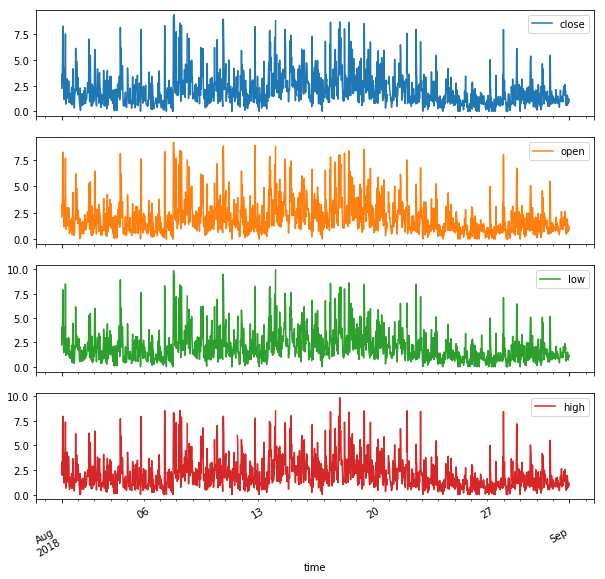

In [5]:
# preprocess data.
# generate the tag for each period(30mins)
avg_range_period = 0
period = '30min'
org_cur_data = cur_datas.copy()[['close', 'open', 'low', 'high']]
resampler = org_cur_data.resample(period)
trend = resampler.pipe(lambda x: 0.5 * (abs(x.max() - x.first()) + abs(x.min() - x.first()))) 
# remove outlier
trend = trend[trend < 10]
trend.plot(figsize=(10,10), subplots=True)

print('trend.mean(): ')
print(trend.mean())
print('\ntrend.std(): ')
print(trend.std())

# periods=len(org_cur_data.index) / 30
# t_index = pd.date_range(start='2018-08-01 00:00:00', end='2018-08-31 23:59:00', freq='30min')

# trend
# print(org_cur_data[30:60])
# print(trend)

# date_time_list=[]
# for t in t_index:
#     date_time_list.append(str(t))
# date_time_list

In [15]:
# load trained model to see what's the prediction of it.
model = joblib.load('model.pkl')
o_c = org_cur_data[['open', 'close']]
prob_pred = model.predict_proba(o_c)
# prob_pred[prob_pred < 0.45] = -1
# prob_pred[prob_pred > 0.55] = 1
?model.predict_proba
prob_pred

array([[0.42819981, 0.57180019],
       [0.42751805, 0.57248195],
       [0.42619074, 0.57380926],
       ...,
       [0.42489641, 0.57510359],
       [0.42465343, 0.57534657],
       [0.42478117, 0.57521883]])